# Analyzing and transforming the data

#### Installing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### After looking at the csv file by hand i noticed there were multiple values that were undefined:
 - I start by creating a list with the strings input names i want to change/remove.
 - Then I read the data and save it as df (DataFrame) while telling it to see the list as NA values.
 - After that I will take a further look into the data and try to get more insight into the data before i change anything.

In [2]:
# after a quick look at the csv file i noticed there were multiple values that were undefined in the data by either 'undefined' or '?'.
na = ['undefined', '?']
# by reading the csv and giving the values i put in the 'na' list the value: na i can remove those values in the future
df = pd.read_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_new.csv", na_values=na)
df.head()

genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
0     73.9   185.0   99.7       0.9      0.0      2.4    6.9      73.1
1     86.0   172.0  105.4       1.8      8.1      0.4    4.2      85.0
2     83.3   176.0  111.4       1.1      0.8      4.6    7.5      81.6
3     82.8   164.0  111.4       4.7     11.8      1.0    2.9      81.0
4     78.7   178.0   71.6       1.5      8.3      4.9    5.5      75.0

In [3]:
# more information!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4095 non-null   float64
 1   length    4093 non-null   float64
 2   mass      4094 non-null   float64
 3   exercise  4095 non-null   float64
 4   smoking   4096 non-null   float64
 5   alcohol   4094 non-null   float64
 6   sugar     4095 non-null   float64
 7   lifespan  4096 non-null   float64
dtypes: float64(8)
memory usage: 256.1 KB


#### While checking the info I notice all Dtypes are floats, this means there is a good chance that the NA values are working properly!

In [4]:
df.describe()

genetic       length         mass     exercise      smoking  \
count  4095.000000  4093.000000  4094.000000  4095.000000  4096.000000   
mean     82.268352   183.880283    92.268442     2.402125     9.807446   
std       7.442579    12.623054    25.791314     1.170062     6.921461   
min      63.900000   154.000000    50.000000     0.100000     0.000000   
25%      77.600000   175.000000    71.500000     1.500000     3.300000   
50%      81.800000   184.000000    89.500000     2.200000     9.500000   
75%      86.700000   193.000000   110.875000     3.200000    15.900000   
max     102.200000   214.000000   163.600000     5.500000    22.200000   

           alcohol        sugar     lifespan  
count  4094.000000  4095.000000  4096.000000  
mean      2.264558     6.482955    80.127783  
std       1.800523     2.710213     8.042270  
min       0.000000     0.700000    -1.000000  
25%       0.600000     4.400000    75.000000  
50%       1.700000     6.300000    79.700000  
75%       4.000000     8.400000    85.200000  
max       6.000000    13.800000   105.100000

#### Here I notice that something is not right, there is just now way for a lifespan to be -1, also there are some columns with less count than others.
#### First let's check for duplicates: 
- First I use the .duplicated function from my pandas library
- Then I print out the dimensionality of the dataframe.duplicated using the .shape function.

In [5]:
# check for duplicates.

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


#### Since the function calls 8 empty columns there are no duplicates.
#### Now check for the NA values, I already know there are some since I created them at the start:
- I do this by printing the .sum of the .isnull function, this lets me see how many NA values there are and in what column they are located.

In [6]:
# check for missing values

print(df.isnull().sum())

genetic     1
length      3
mass        2
exercise    1
smoking     0
alcohol     2
sugar       1
lifespan    0
dtype: int64


#### As expected there are some NA values, luckily there arent many considering I have more than 4000 rows.
#### Since there aren't many NA values i've dicided to remove the rows containing these values:
- for this I use the .dropna function

In [7]:
# remove the missing values (there aren't many so we won't miss them)
df = df.dropna()
print(df.isnull().sum())

genetic     0
length      0
mass        0
exercise    0
smoking     0
alcohol     0
sugar       0
lifespan    0
dtype: int64


#### Now that I'm sure i dont have any more NA values, I would like to add another row with a calculated BMI (Body Mass Index).
bmi =  a person's weight in kilograms divided by the square of height in meters.
#### to do this:
- I take the dataframe 'mass' and 'length' column to use the formula on and put them in a new column called bmi.
#### edit:
- While doing this I found out that the length was in centimeters, by deviding length with 100 I converted it to meters.
- I also used the round function to round the results to 2 decimals.

In [248]:
# to add the bmi I also need to change the length to meters instead of centimeters.
# bmi is mass / length**2

df['bmi'] = round(df['mass'] / (df['length']/100)**2, 2)
df = df.drop(columns=['length','mass'])
df.head()

genetic  exercise  smoking  alcohol  sugar  lifespan    bmi
0     73.9       0.9      0.0      2.4    6.9      73.1  29.13
1     86.0       1.8      8.1      0.4    4.2      85.0  35.63
2     83.3       1.1      0.8      4.6    7.5      81.6  35.96
3     82.8       4.7     11.8      1.0    2.9      81.0  41.42
4     78.7       1.5      8.3      4.9    5.5      75.0  22.60

#### Now the bmi is the last column in the data, I want lifespan to be the last.
#### To solve this I use indexing:
- first I create a list with the order I would like the columns to be in using index inputs.
- I then call my dataframe.columns with the list I just made and save this.

In [249]:
# # changing the order of the columns.
new_order = [0,1,2,3,4,6,5]
df = df[df.columns[new_order]]

df.describe()

genetic     exercise      smoking      alcohol        sugar  \
count  4086.000000  4086.000000  4086.000000  4086.000000  4086.000000   
mean     82.280127     2.403353     9.812677     2.266006     6.484973   
std       7.440070     1.170593     6.919057     1.801020     2.709868   
min      63.900000     0.100000     0.000000     0.000000     0.700000   
25%      77.600000     1.500000     3.400000     0.600000     4.400000   
50%      81.800000     2.200000     9.500000     1.700000     6.300000   
75%      86.700000     3.200000    15.900000     4.000000     8.400000   
max     102.200000     5.500000    22.200000     6.000000    13.800000   

               bmi     lifespan  
count  4086.000000  4086.000000  
mean     27.684195    80.137959  
std       8.715878     8.041656  
min      11.320000    -1.000000  
25%      20.932500    75.000000  
50%      26.475000    79.700000  
75%      33.222500    85.200000  
max      65.870000   105.100000

#### Let's use the .subplots function from matplotlib and the .boxplot function from the seaborn library to visualise the outliers.

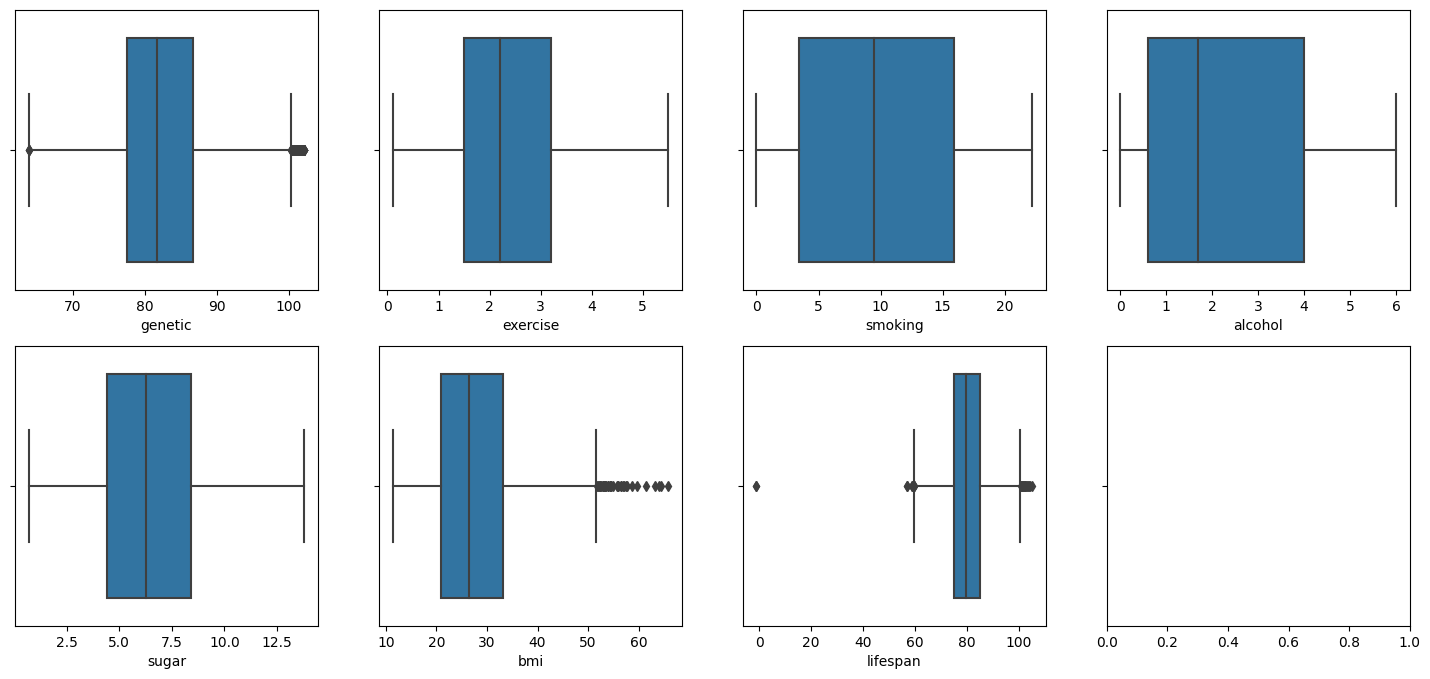

In [276]:
# checking outliers

fig, axes = plt.subplots(2, 4, figsize=(18,8), sharey= True)
sns.boxplot(ax=axes[0,0], x=df['genetic'])
sns.boxplot(ax=axes[0,1], x=df['exercise'])
sns.boxplot(ax=axes[0,2], x=df['smoking'])
sns.boxplot(ax=axes[0,3], x=df['alcohol'])
sns.boxplot(ax=axes[1,0], x=df['sugar'])
sns.boxplot(ax=axes[1,1], x=df['bmi'])
sns.boxplot(ax=axes[1,2], x=df['lifespan'])

plt.show()


#### Now lets remove the low lifespan values by hand and save it in another variable.
- to do this i call all lifespan values that are more than 10. so if there is more extremely low numbers these are thrown away aswell.

In [251]:
# let's try to remove the obvious ones by hand.

df1 = df[df['lifespan'] > 10]

df1.describe()


genetic     exercise      smoking      alcohol        sugar  \
count  4084.000000  4084.000000  4084.000000  4084.000000  4084.000000   
mean     82.278624     2.403477     9.809035     2.266846     6.487169   
std       7.441333     1.170426     6.918614     1.801044     2.708622   
min      63.900000     0.100000     0.000000     0.000000     0.700000   
25%      77.600000     1.500000     3.375000     0.600000     4.400000   
50%      81.800000     2.200000     9.500000     1.700000     6.300000   
75%      86.700000     3.200000    15.900000     4.000000     8.400000   
max     102.200000     5.500000    22.200000     6.000000    13.800000   

               bmi     lifespan  
count  4084.000000  4084.000000  
mean     27.682023    80.177693  
std       8.711736     7.840508  
min      11.320000    57.000000  
25%      20.937500    75.000000  
50%      26.475000    79.700000  
75%      33.207500    85.200000  
max      65.870000   105.100000

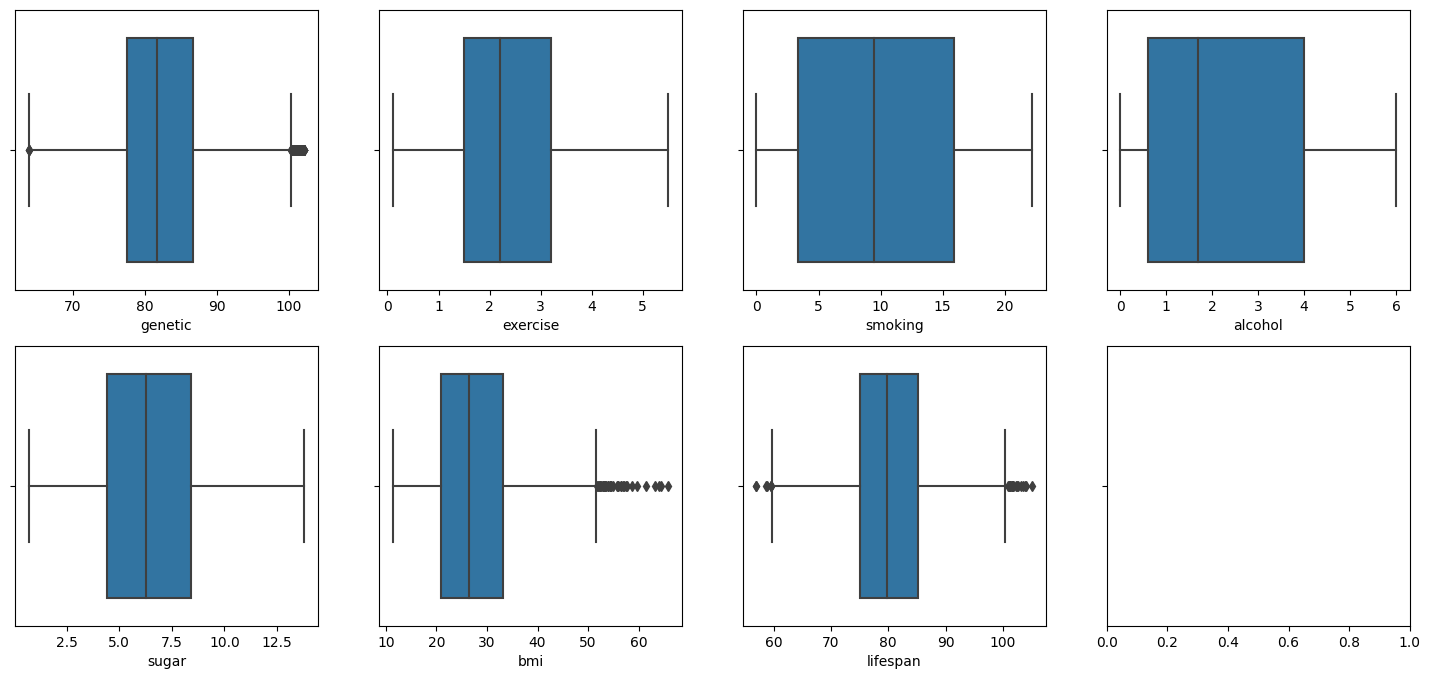

In [274]:
fig, axes = plt.subplots(2, 4, figsize=(18,8), sharey= True)
sns.boxplot(ax=axes[0,0], x=df1['genetic'])
sns.boxplot(ax=axes[0,1], x=df1['exercise'])
sns.boxplot(ax=axes[0,2], x=df1['smoking'])
sns.boxplot(ax=axes[0,3], x=df1['alcohol'])
sns.boxplot(ax=axes[1,0], x=df1['sugar'])
sns.boxplot(ax=axes[1,1], x=df1['bmi'])
sns.boxplot(ax=axes[1,2], x=df1['lifespan'])

plt.show()


#### I would also like to calculate the IQR (InterQuartile Range) and save this in another variable to remove more outliers, I want to be able to compare the 2 results.
the interquartile range is the region between the 75th and 25th percentile.
to do this:
- I use the .quantile function from the numpy library with the values 0.25 (25%) and 0.75 (75%) and save them seperatly in variables (Q1 and Q3)
- Then I subtract Q1 from Q3 and put the result in a new variable (IQR) 
- then I apply the formula and save this in as a new dataset

In [253]:
# Lets filter the original data with IQR (InterQuartile Range)
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print()
print(Q3)
print()
print(IQR)
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

genetic     77.6000
exercise     1.5000
smoking      3.3750
alcohol      0.6000
sugar        4.4000
bmi         20.9375
lifespan    75.0000
Name: 0.25, dtype: float64

genetic     86.7000
exercise     3.2000
smoking     15.9000
alcohol      4.0000
sugar        8.4000
bmi         33.2075
lifespan    85.2000
Name: 0.75, dtype: float64

genetic      9.100
exercise     1.700
smoking     12.525
alcohol      3.400
sugar        4.000
bmi         12.270
lifespan    10.200
dtype: float64


In [254]:
df2.describe()

genetic     exercise      smoking      alcohol        sugar  \
count  3977.000000  3977.000000  3977.000000  3977.000000  3977.000000   
mean     82.038823     2.404249     9.780639     2.269776     6.484461   
std       7.087155     1.170096     6.910443     1.803397     2.707867   
min      64.000000     0.100000     0.000000     0.000000     0.700000   
25%      77.600000     1.500000     3.300000     0.600000     4.400000   
50%      81.700000     2.200000     9.500000     1.700000     6.300000   
75%      86.500000     3.200000    15.800000     4.000000     8.400000   
max     100.300000     5.500000    22.200000     6.000000    13.800000   

               bmi     lifespan  
count  3977.000000  3977.000000  
mean     27.419427    79.988358  
std       8.306660     7.453324  
min      11.320000    59.700000  
25%      20.890000    75.000000  
50%      26.380000    79.600000  
75%      32.990000    84.900000  
max      51.550000   100.400000

#### I can already see some changes, everything looks a little more normal.
#### Let's check the boxplot again.

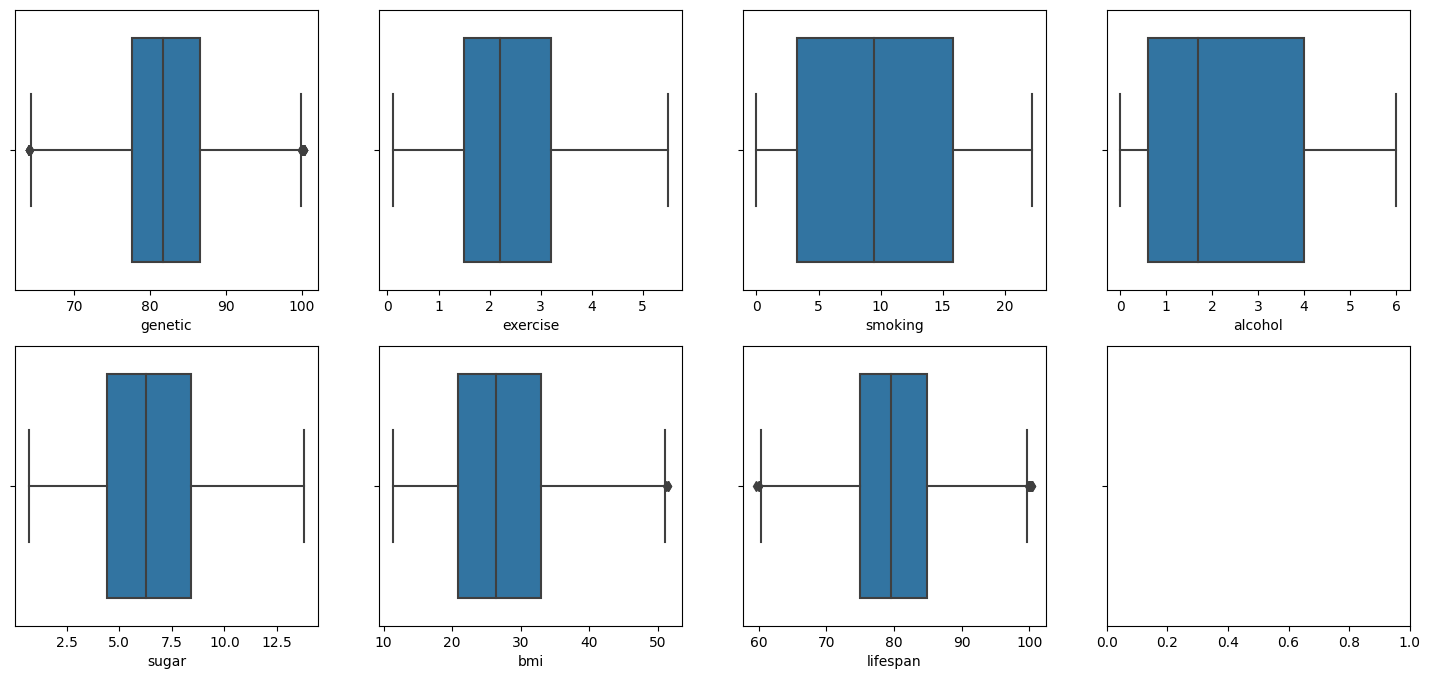

In [273]:
# re-check for outliers
fig, axes = plt.subplots(2, 4, figsize=(18,8), sharey= True)
sns.boxplot(ax=axes[0,0], x=df2['genetic'])
sns.boxplot(ax=axes[0,1], x=df2['exercise'])
sns.boxplot(ax=axes[0,2], x=df2['smoking'])
sns.boxplot(ax=axes[0,3], x=df2['alcohol'])
sns.boxplot(ax=axes[1,0], x=df2['sugar'])
sns.boxplot(ax=axes[1,1], x=df2['bmi'])
sns.boxplot(ax=axes[1,2], x=df2['lifespan'])

plt.show()

#### Now I want to put the cleaned up data in a heatmap to check the correlation levels between the values.
to do this:
- I use the .heatmap function from seaborn and change the size of the result with the .figure function from matplotlib.
- To calculate the values of the correlation I use the .corr function from the pandas library, this wil give me an output using 'pearson' as the default method.

genetic  exercise   smoking   alcohol     sugar       bmi  lifespan
genetic   1.000000 -0.045166 -0.010465 -0.012933  0.018005  0.014389  0.947356
exercise -0.045166  1.000000  0.027432 -0.020427 -0.007369  0.010882  0.075513
smoking  -0.010465  0.027432  1.000000 -0.008643  0.011172 -0.005161 -0.250217
alcohol  -0.012933 -0.020427 -0.008643  1.000000  0.002924  0.002803 -0.065921
sugar     0.018005 -0.007369  0.011172  0.002924  1.000000  0.001487 -0.013590
bmi       0.014389  0.010882 -0.005161  0.002803  0.001487  1.000000 -0.056273
lifespan  0.947356  0.075513 -0.250217 -0.065921 -0.013590 -0.056273  1.000000

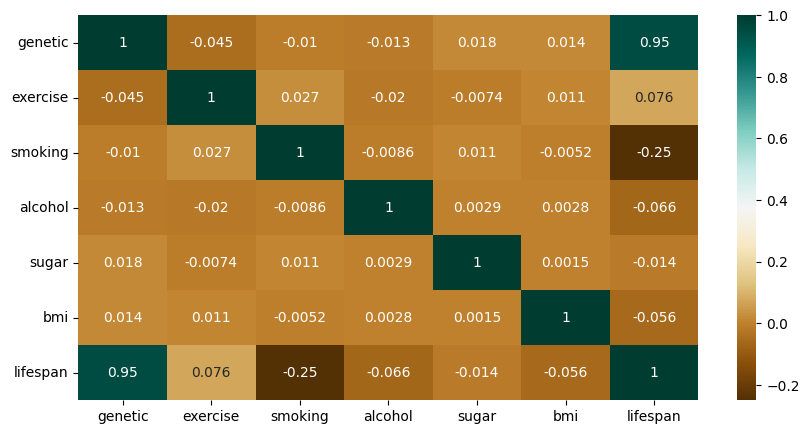

In [256]:
# checking the relevance from the IQR

plt.figure(figsize=(10,5))
c2= df2.corr()
sns.heatmap(c2,cmap="BrBG",annot=True)
c2

#### I would like to see this in the form of scatterplots in correlation with eachother to get more visualisation.
- To do this I use the .pairplot function from seaborn.

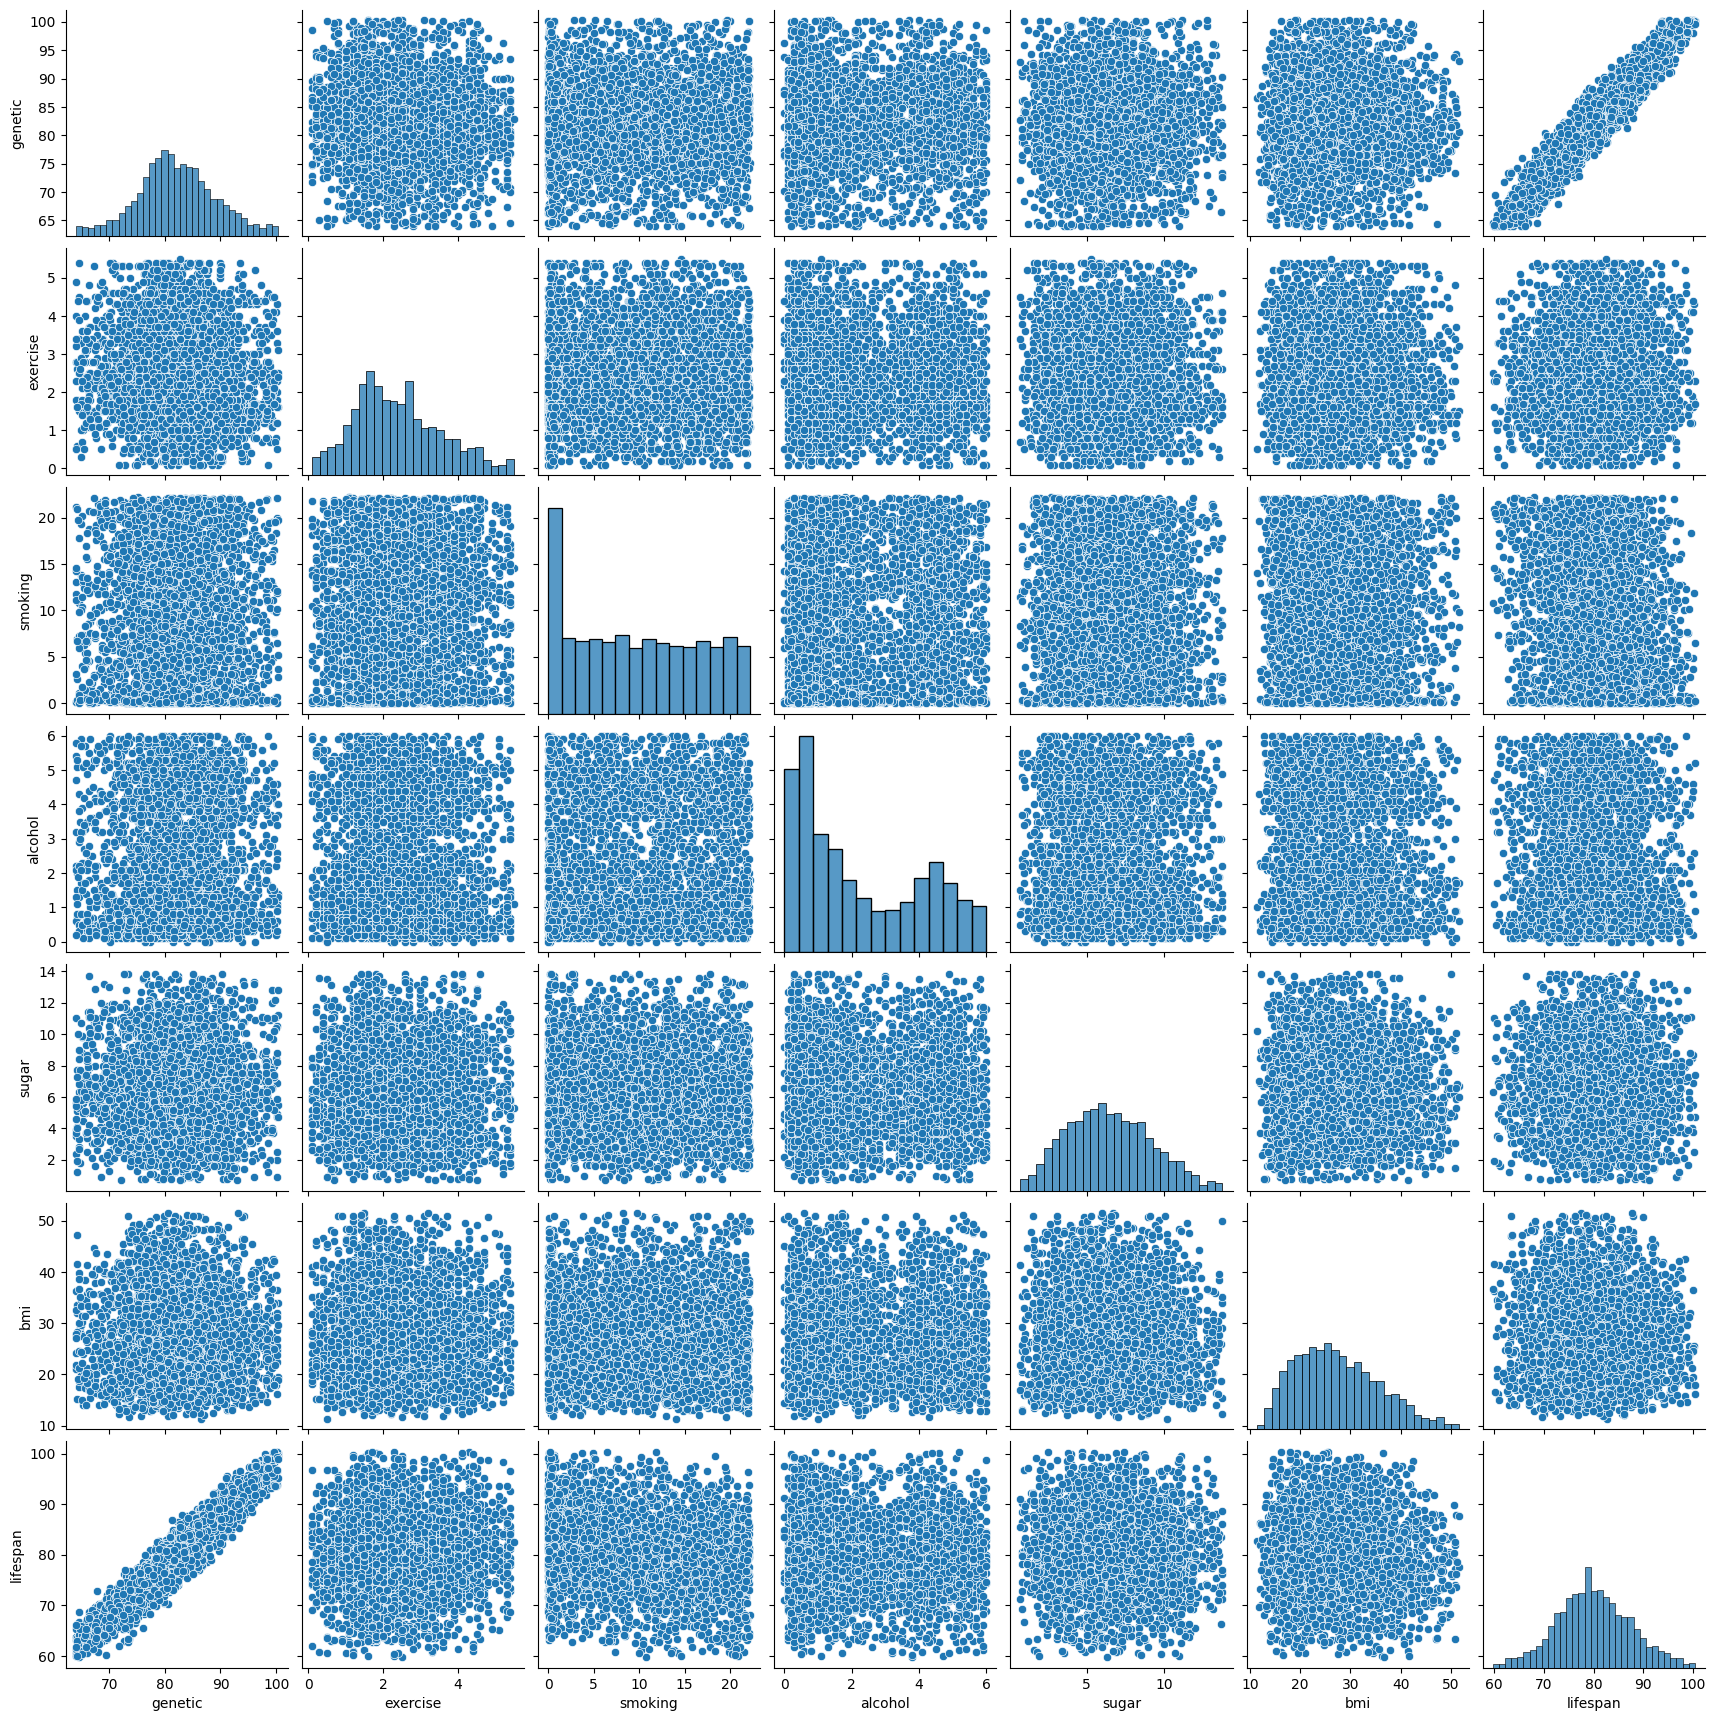

In [257]:
# lets use pairplots to look for patterns!
sns.pairplot(df2)

#### Now lets do the same 2 things with the full dataset!

genetic  exercise   smoking   alcohol     sugar       bmi  lifespan
genetic   1.000000 -0.035005 -0.015490 -0.013170  0.018785  0.009997  0.949799
exercise -0.035005  1.000000  0.021512 -0.024521 -0.008328  0.002002  0.082986
smoking  -0.015490  0.021512  1.000000 -0.012298  0.008925  0.005426 -0.246140
alcohol  -0.013170 -0.024521 -0.012298  1.000000  0.003860  0.003300 -0.063539
sugar     0.018785 -0.008328  0.008925  0.003860  1.000000  0.001892 -0.010887
bmi       0.009997  0.002002  0.005426  0.003300  0.001892  1.000000 -0.074155
lifespan  0.949799  0.082986 -0.246140 -0.063539 -0.010887 -0.074155  1.000000

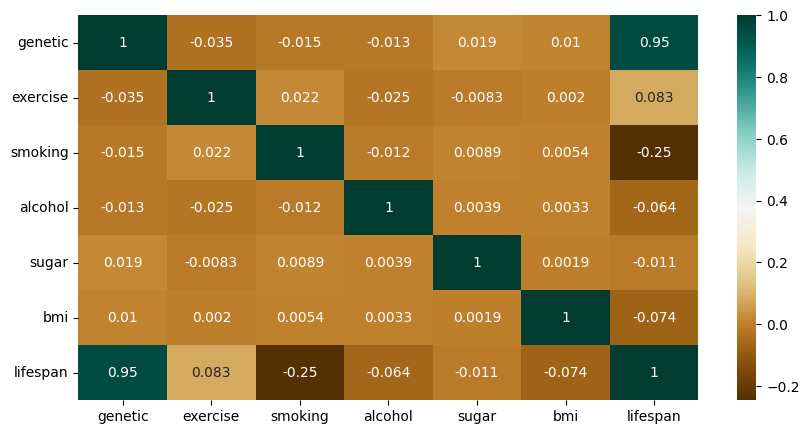

In [258]:
# checking the relevance with our data cleaned up by hand.

plt.figure(figsize=(10,5))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

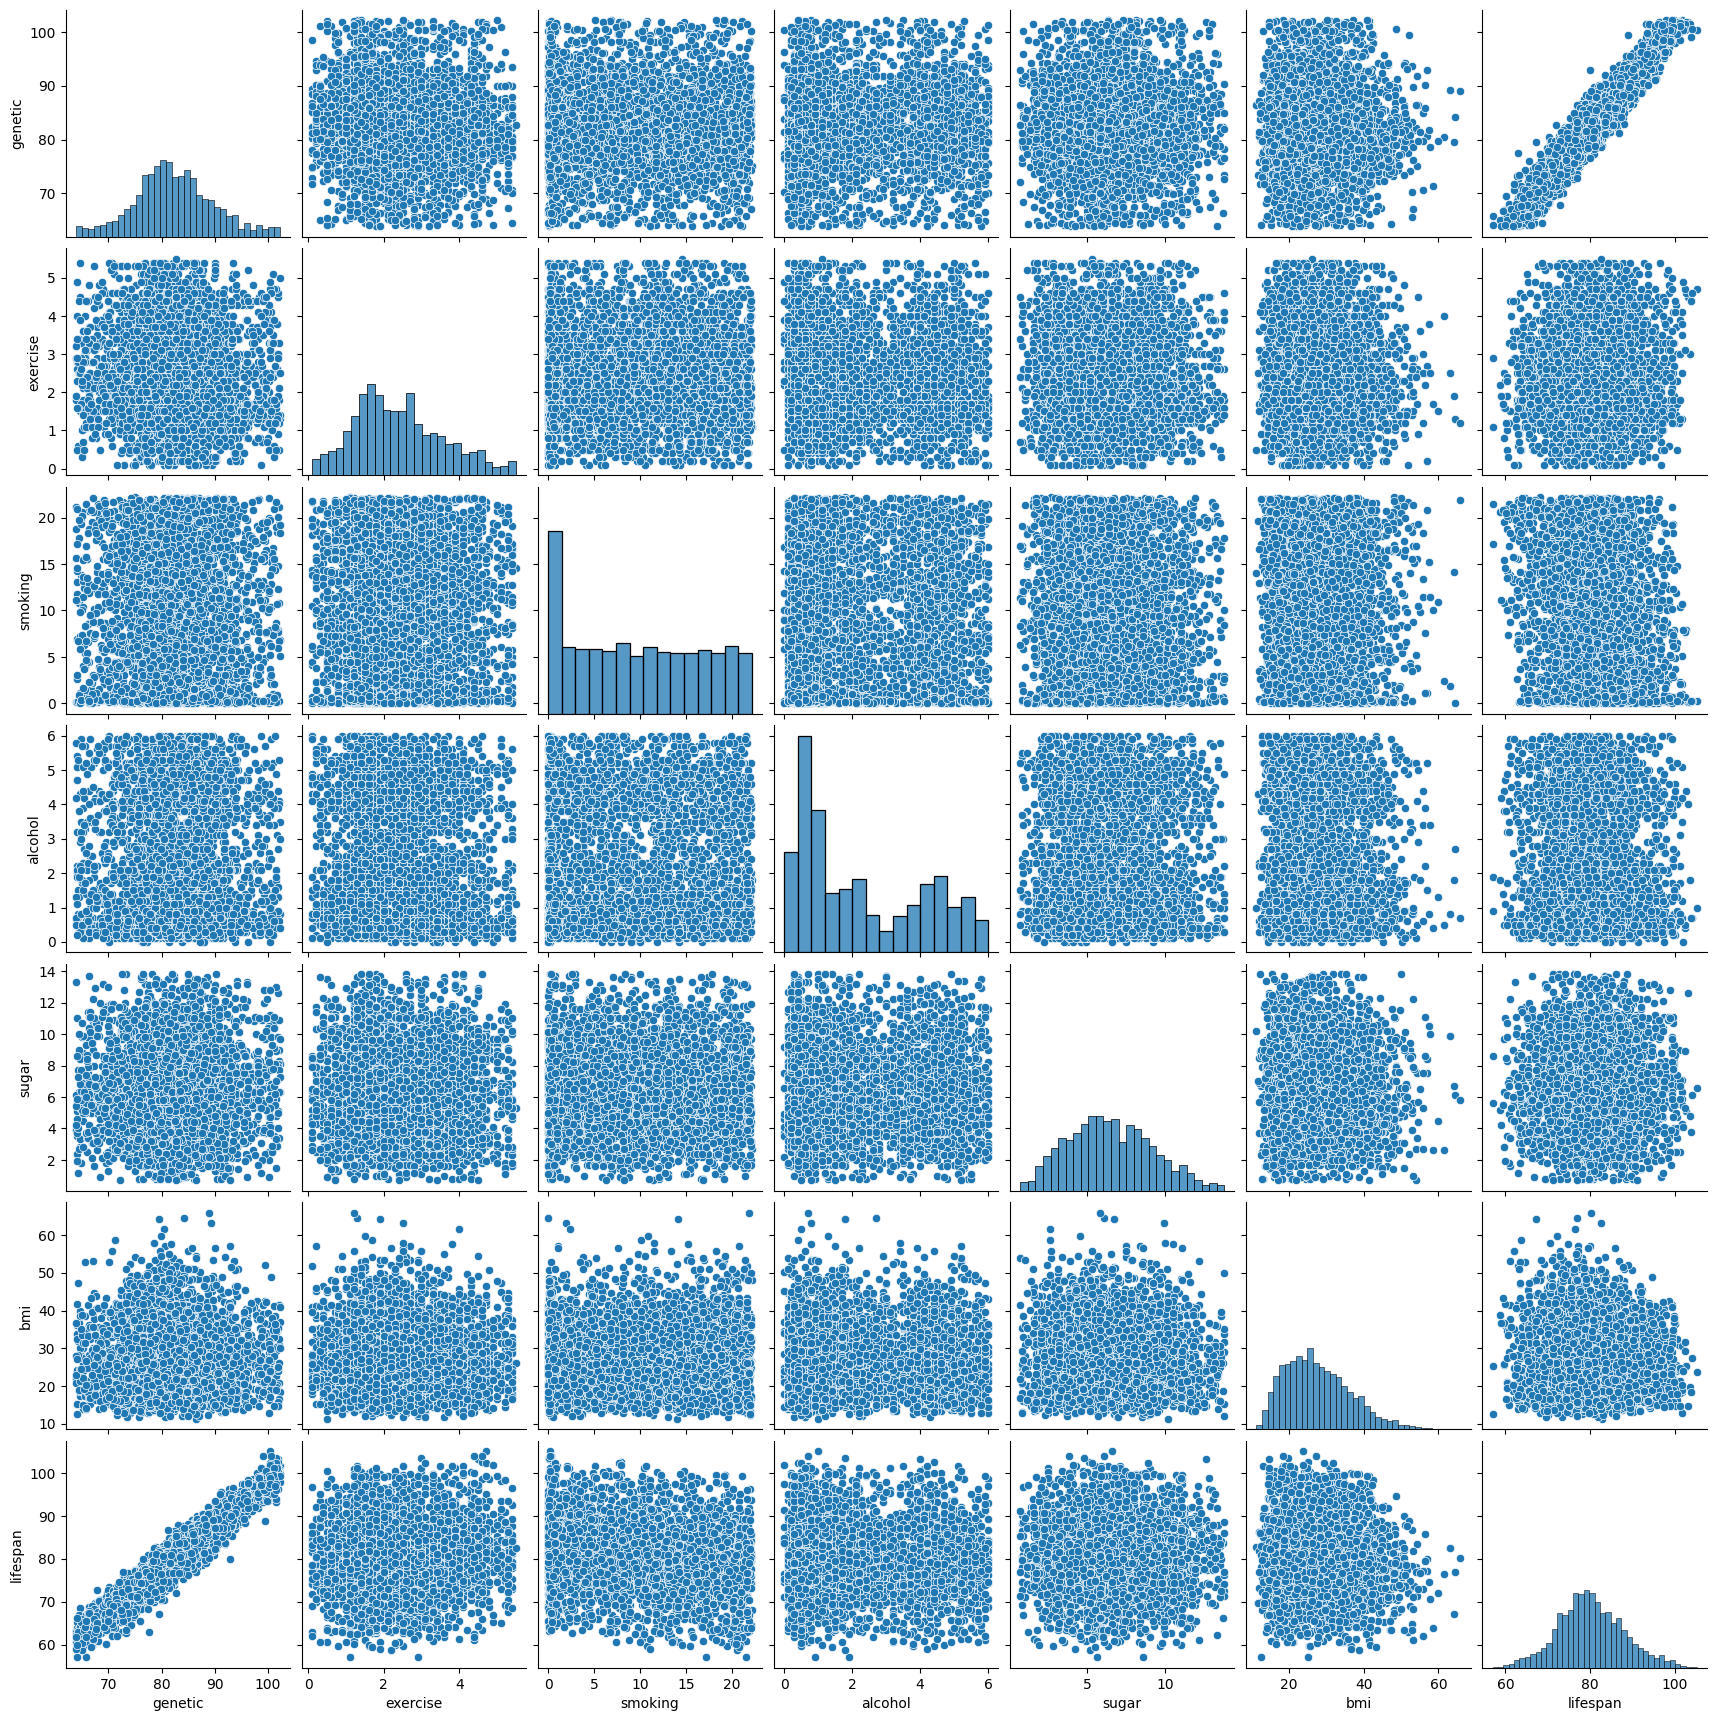

In [259]:
# let's look at the plots!
sns.pairplot(df1)

#### Now I want to save the to datasets sepperately (to csv) so that I can use these sets in the future.
- To do this I use the .to_csv function from pandas enter the path I want the files to be saved to.

In [260]:
# save the cleaned up data as csv for future use

# df2.to_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_new_iqr.csv", index=False)
# df1.to_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_new_clean.csv", index=False)

# Look at pipeline.py to see how I create a pipeline with a DataBase